In [104]:
import pandas as pd
df= pd.read_csv("Metabolic Syndrome.csv")
df

,seqn,Age,Sex,Marital,Income,Race,WaistCirc,BMI,Albuminuria,UrAlbCr,UricAcid,BloodGlucose,HDL,Triglycerides,MetabolicSyndrome
0,62161,22,Male,Single,8200.0,White,81.0,23.3,0,3.88,4.9,92,41,84,0
1,62164,44,Female,Married,4500.0,White,80.1,23.2,0,8.55,4.5,82,28,56,0
2,62169,21,Male,Single,800.0,Asian,69.6,20.1,0,5.07,5.4,107,43,78,0
3,62172,43,Female,Single,2000.0,Black,120.4,33.3,0,5.22,5.0,104,73,141,0
4,62177,51,Male,Married,NaN,Asian,81.1,20.1,0,8.13,5.0,95,43,126,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2396,71901,48,Female,Married,1000.0,Other,NaN,59.7,0,22.11,5.8,152,57,107,0
2397,71904,30,Female,Single,2000.0,Asian,NaN,18.0,0,2.90,7.9,91,90,91,0
2398,71909,28,Male,Single,800.0,MexAmerican,100.8,29.4,0,2.78,6.2,99,47,84,0
2399,71911,27,Male,Married,8200.0,MexAmerican,106.6,31.3,0,4.15,6.2,100,41,124,1


In [105]:
duplicates=df.duplicated()
sum(duplicates)


0

In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2401 entries, 0 to 2400
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   seqn               2401 non-null   int64  
 1   Age                2401 non-null   int64  
 2   Sex                2401 non-null   object 
 3   Marital            2193 non-null   object 
 4   Income             2284 non-null   float64
 5   Race               2401 non-null   object 
 6   WaistCirc          2316 non-null   float64
 7   BMI                2375 non-null   float64
 8   Albuminuria        2401 non-null   int64  
 9   UrAlbCr            2401 non-null   float64
 10  UricAcid           2401 non-null   float64
 11  BloodGlucose       2401 non-null   int64  
 12  HDL                2401 non-null   int64  
 13  Triglycerides      2401 non-null   int64  
 14  MetabolicSyndrome  2401 non-null   int64  
dtypes: float64(5), int64(7), object(3)
memory usage: 281.5+ KB


In [107]:
# Convert 'Albuminuria' column to object type
df['Albuminuria'] =df['Albuminuria'].astype('object')

# Optional: Check the result
print(df.dtypes['Albuminuria'])

# Convert 'Albuminuria' column to object type
df['MetabolicSyndrome'] =df['MetabolicSyndrome'].astype('object')

# Optional: Check the result
print(df.dtypes['MetabolicSyndrome'])

object
object


In [108]:
df.describe()

,seqn,Age,Income,WaistCirc,BMI,UrAlbCr,UricAcid,BloodGlucose,HDL,Triglycerides
count,2401.000000,2401.000000,2284.000000,2316.000000,2375.000000,2401.000000,2401.000000,2401.000000,2401.000000,2401.000000
mean,67030.674302,48.691795,4005.253940,98.307254,28.702189,43.626131,5.489046,108.247813,53.369429,128.125364
std,2823.565114,17.632852,2954.032186,16.252634,6.662242,258.272829,1.439358,34.820657,15.185537,95.322477
min,62161.000000,20.000000,300.000000,56.200000,13.400000,1.400000,1.800000,39.000000,14.000000,26.000000
25%,64591.000000,34.000000,1600.000000,86.675000,24.000000,4.450000,4.500000,92.000000,43.000000,75.000000
50%,67059.000000,48.000000,2500.000000,97.000000,27.700000,7.070000,5.400000,99.000000,51.000000,103.000000
75%,69495.000000,63.000000,6200.000000,107.625000,32.100000,13.690000,6.400000,110.000000,62.000000,150.000000
max,71915.000000,80.000000,9000.000000,176.000000,68.700000,5928.000000,11.300000,382.000000,156.000000,1562.000000


In [109]:
from sklearn.model_selection import train_test_split

# If you have a target variable, add it here:
# quantile_df['target'] = df['YourTargetColumn']

# Split into train and test (80% train, 20% test)
train_df, test_df = train_test_split(
    df, 
    test_size=0.2, 
    random_state=42
)

# Check shape for confirmation
print("Train shape:", train_df.shape)
print("Test shape:", test_df.shape)


Train shape: (1920, 15)
Test shape: (481, 15)


In [110]:
###### EDA ######

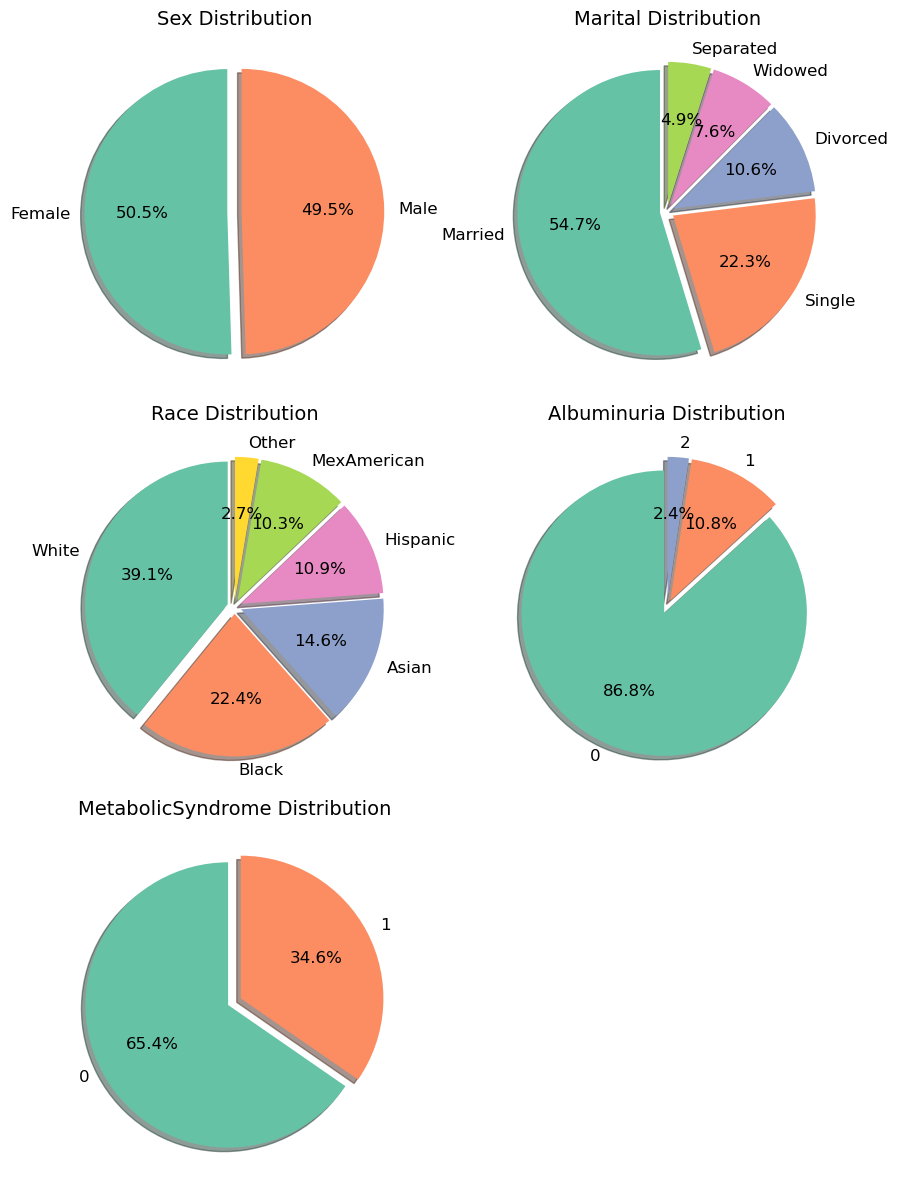

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt
import math

columns_to_look = ["Sex", "Marital", "Race", "Albuminuria", "MetabolicSyndrome"]

# Grid setup: 2 plots per row
n_cols = 2
n_rows = math.ceil(len(columns_to_look) / n_cols)

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(9, 4 * n_rows))
axes = axes.flatten()
pie_train_df = train_df
for i, col in enumerate(columns_to_look):
    non_null_values = pie_train_df[col].dropna()
    value_counts = non_null_values.value_counts()
    labels = value_counts.index.tolist()
    pie_colors = sns.color_palette('Set2', len(labels))

    axes[i].pie(
        value_counts,
        labels=labels,
        shadow=True,
        explode=[0.05] * len(labels),
        autopct='%1.1f%%',
        textprops={'size': 12},
        colors=pie_colors,
        startangle=90
    )
    axes[i].set_title(f'{col} Distribution', fontsize=14)

# Hide unused axes if the number of columns is odd
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [111]:
print(f"Dimensions: {pie_train_df.shape}") 
print(f"Dimensions: {train_df.shape}")  

Dimensions: (1920, 15)
Dimensions: (1920, 15)


In [112]:
import pandas as pd

# Select numerical columns
numerical_cols = ['Age', 'Income', 'WaistCirc', 'BMI', 'UrAlbCr', 'UricAcid', 'BloodGlucose', 'HDL', 'Triglycerides']

# Generate summary statistics
summary = train_df[numerical_cols].describe(percentiles=[.25, .5, .75])
print(summary.loc[['min', 'max']])  # Show only min/max

      Age  Income  WaistCirc   BMI  UrAlbCr  UricAcid  BloodGlucose    HDL  \
min  20.0   300.0       63.1  13.6      1.4       1.8          39.0   21.0   
max  80.0  9000.0      176.0  68.7   5928.0      11.3         382.0  156.0   

     Triglycerides  
min           26.0  
max         1562.0  


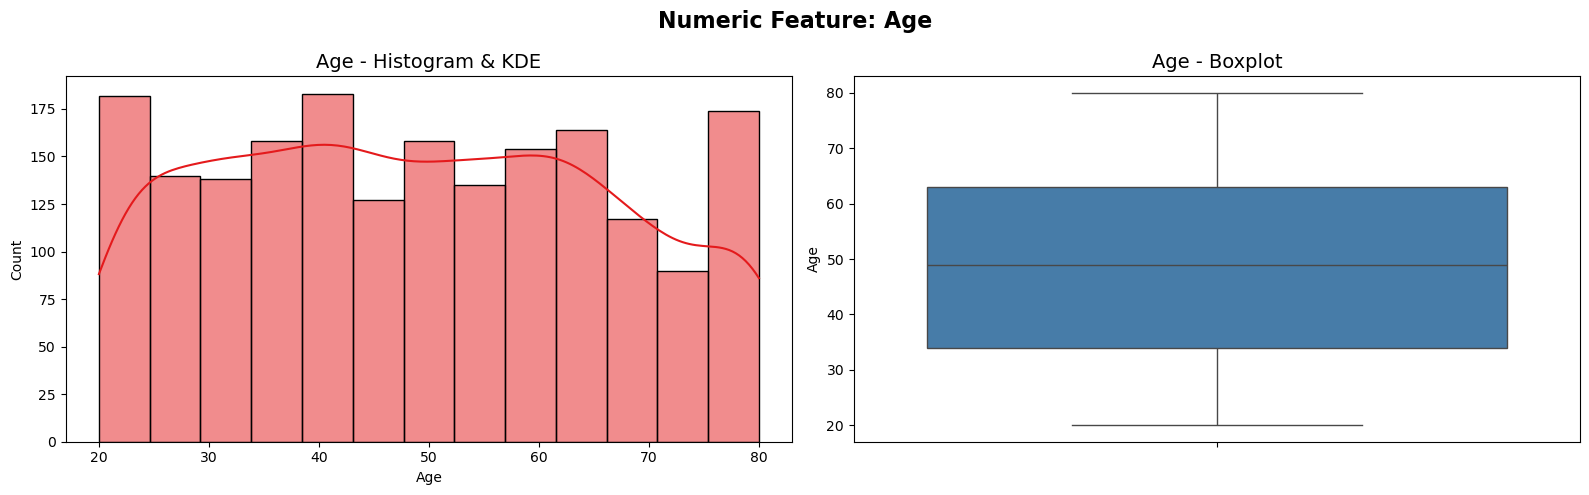

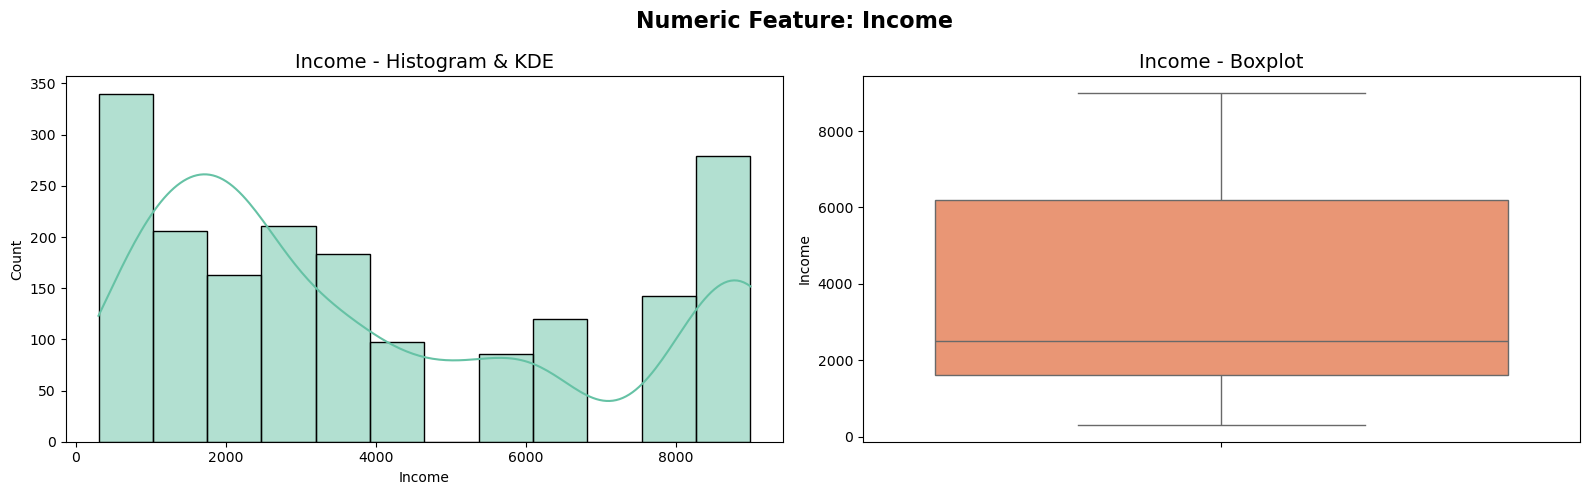

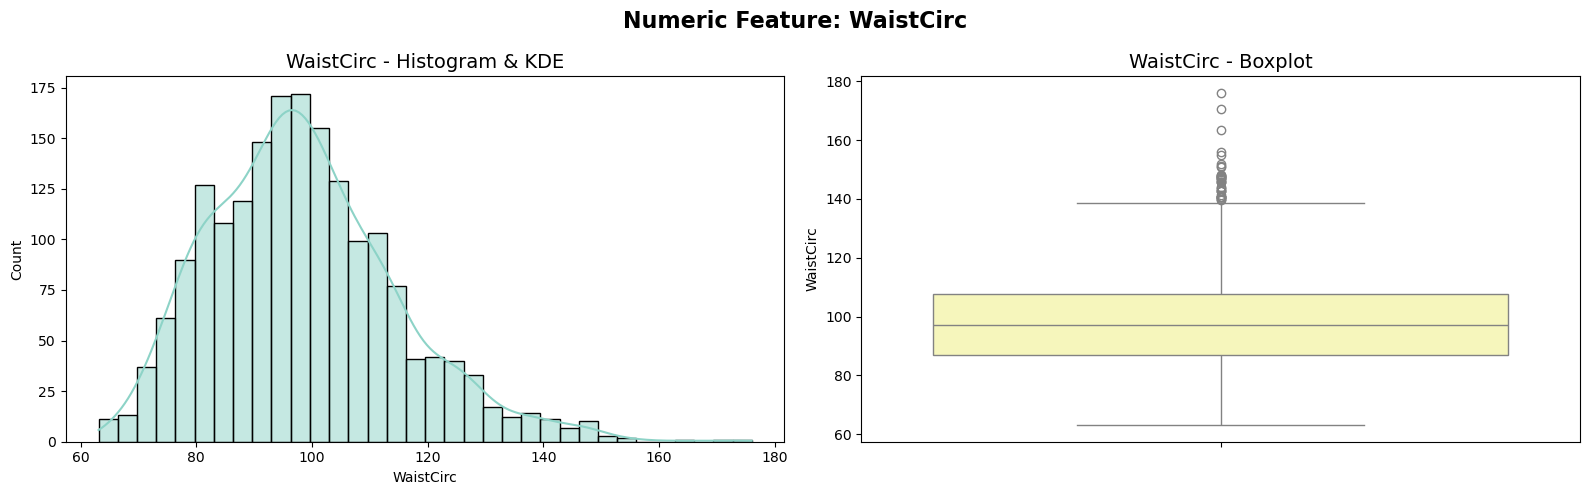

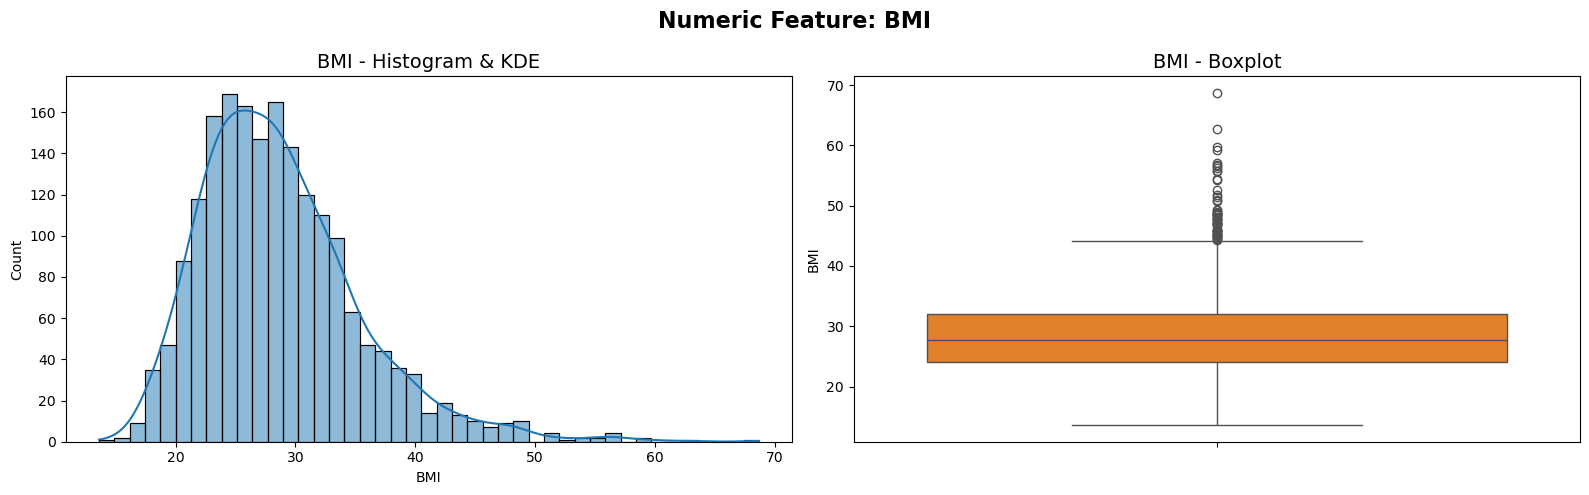

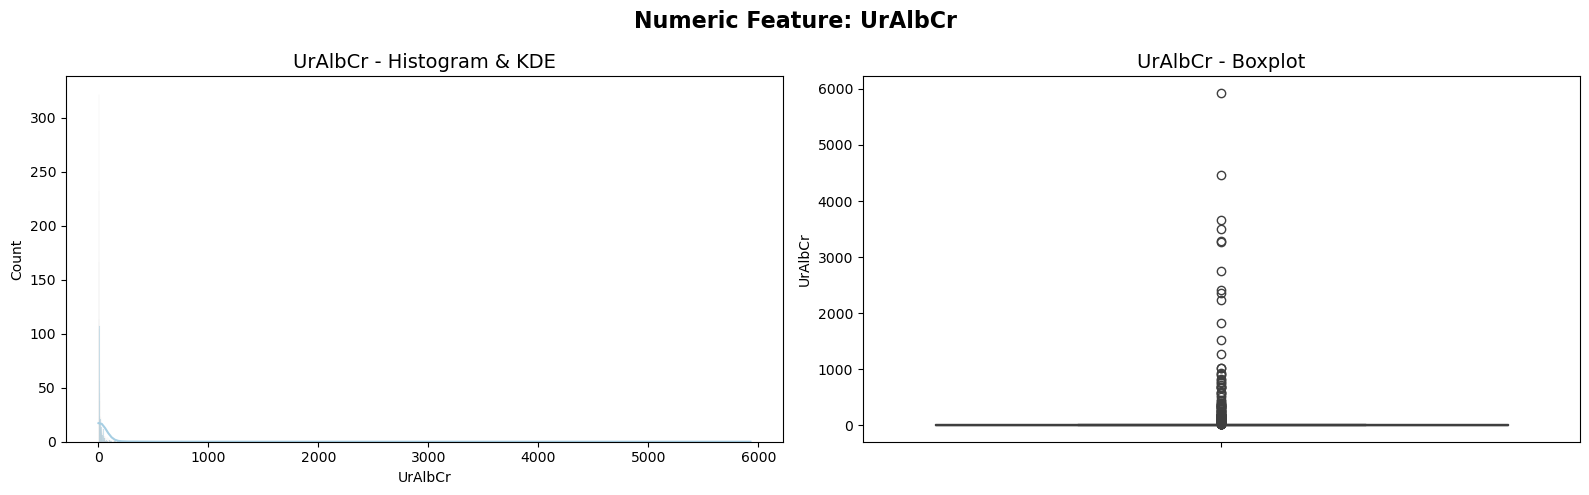

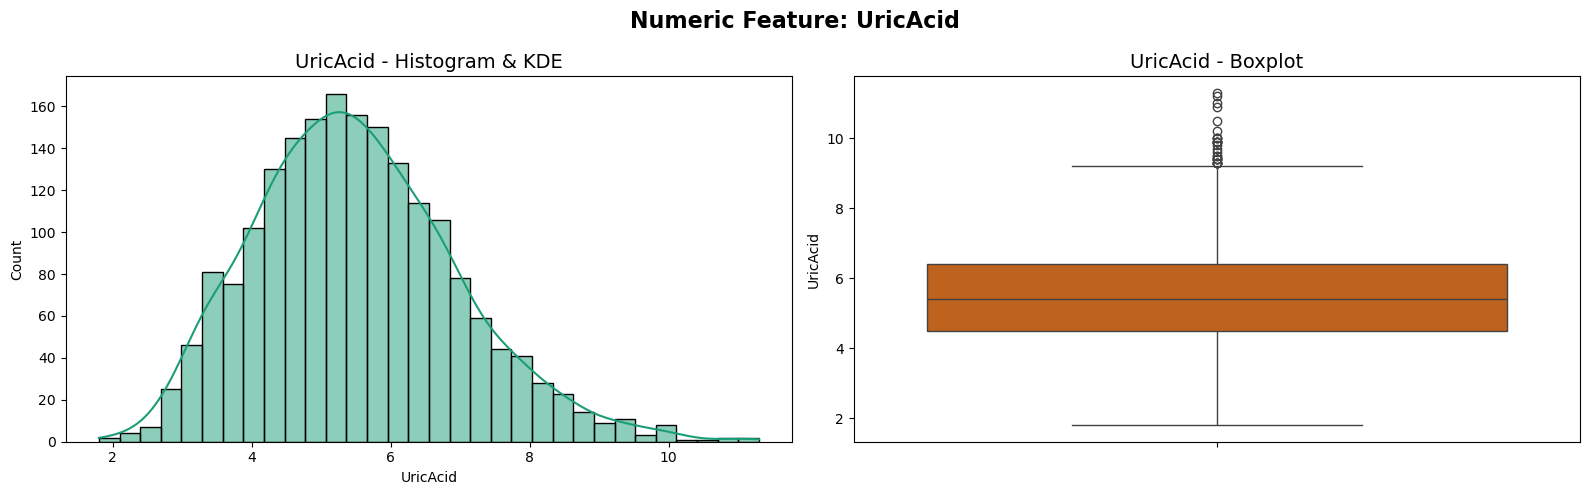

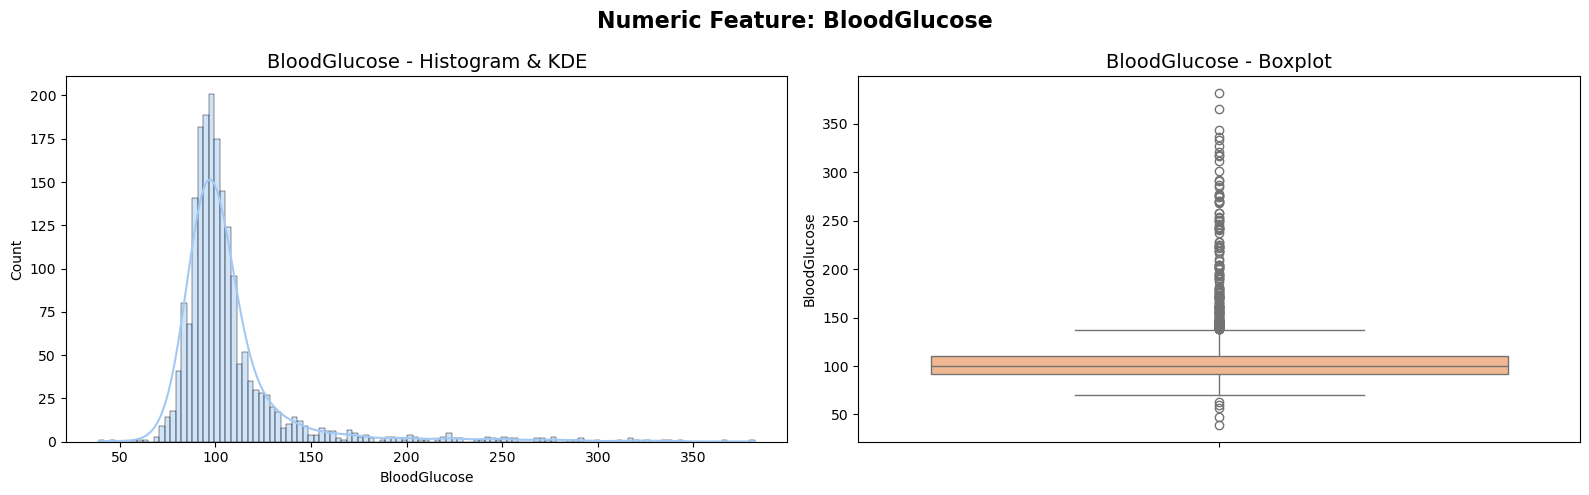

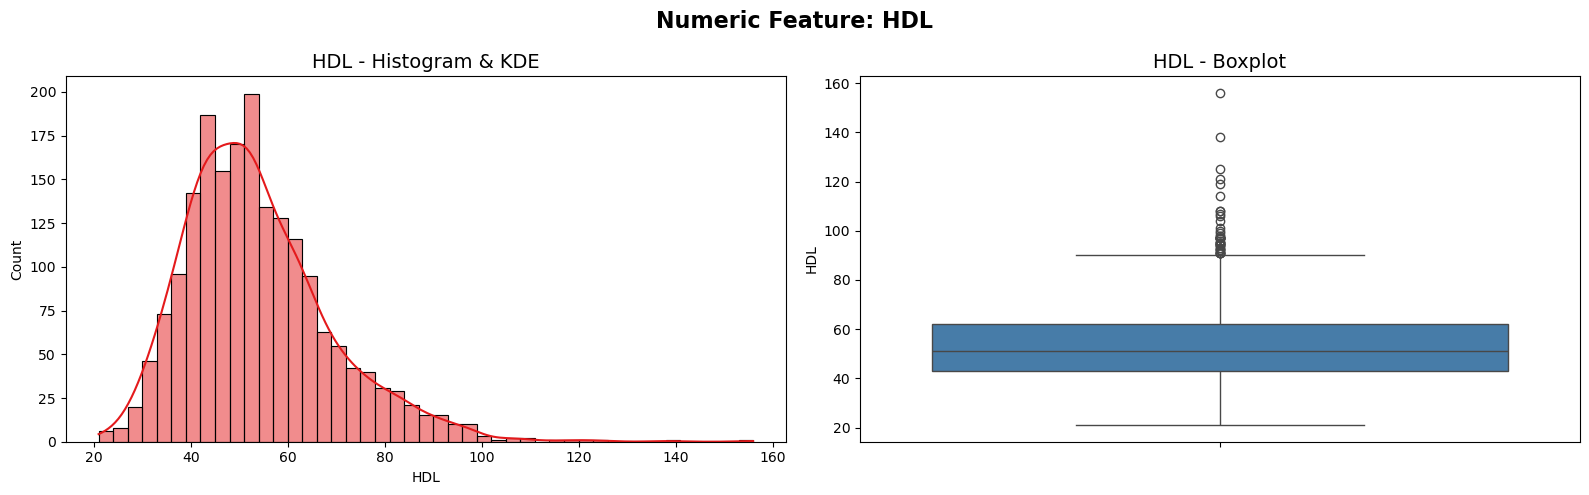

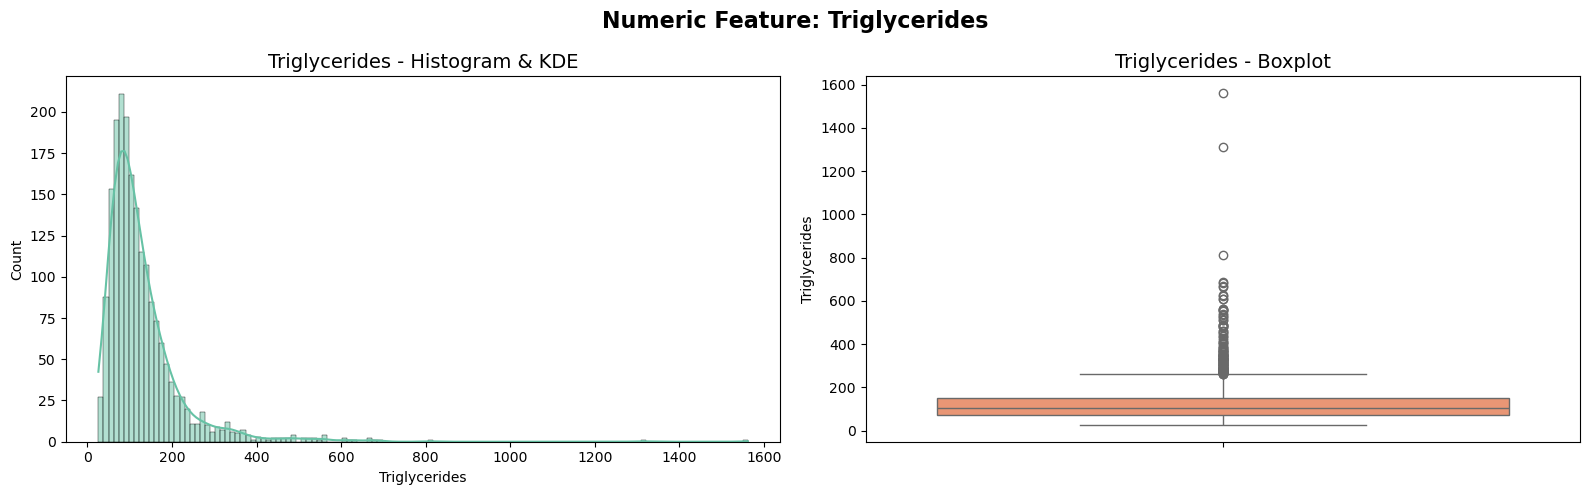

In [113]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

def plot_numeric_kde_boxplot(train_df, numeric_cols):
    # Define a list of Seaborn color palettes
    palette_list = ['Set1', 'Set2', 'Set3', 'tab10', 'Paired', 'Dark2', 'pastel']

    for i, col in enumerate(numeric_cols):
        fig, axes = plt.subplots(1, 2, figsize=(16, 5))
        
        # Pick a palette based on index (cyclic)
        palette = sns.color_palette(palette_list[i % len(palette_list)])
        color_hist = palette[0]
        color_box = palette[1] if len(palette) > 1 else palette[0]

        # KDE + Histogram
        sns.histplot(train_df, x=col, kde=True, color=color_hist, ax=axes[0])
        axes[0].set_title(f'{col} - Histogram & KDE', fontsize=14)

        # Boxplot
        sns.boxplot(train_df, y=col, color=color_box, ax=axes[1])
        axes[1].set_title(f'{col} - Boxplot', fontsize=14)

        # Overall title
        fig.suptitle(f'Numeric Feature: {col}', fontsize=16, fontweight='bold')
        fig.subplots_adjust(wspace=0.3)
        plt.tight_layout()
        plt.show()


numeric_cols = train_df.drop(columns=["seqn", "Albuminuria","MetabolicSyndrome"]).select_dtypes(include="number").columns
plot_numeric_kde_boxplot(train_df, numeric_cols)


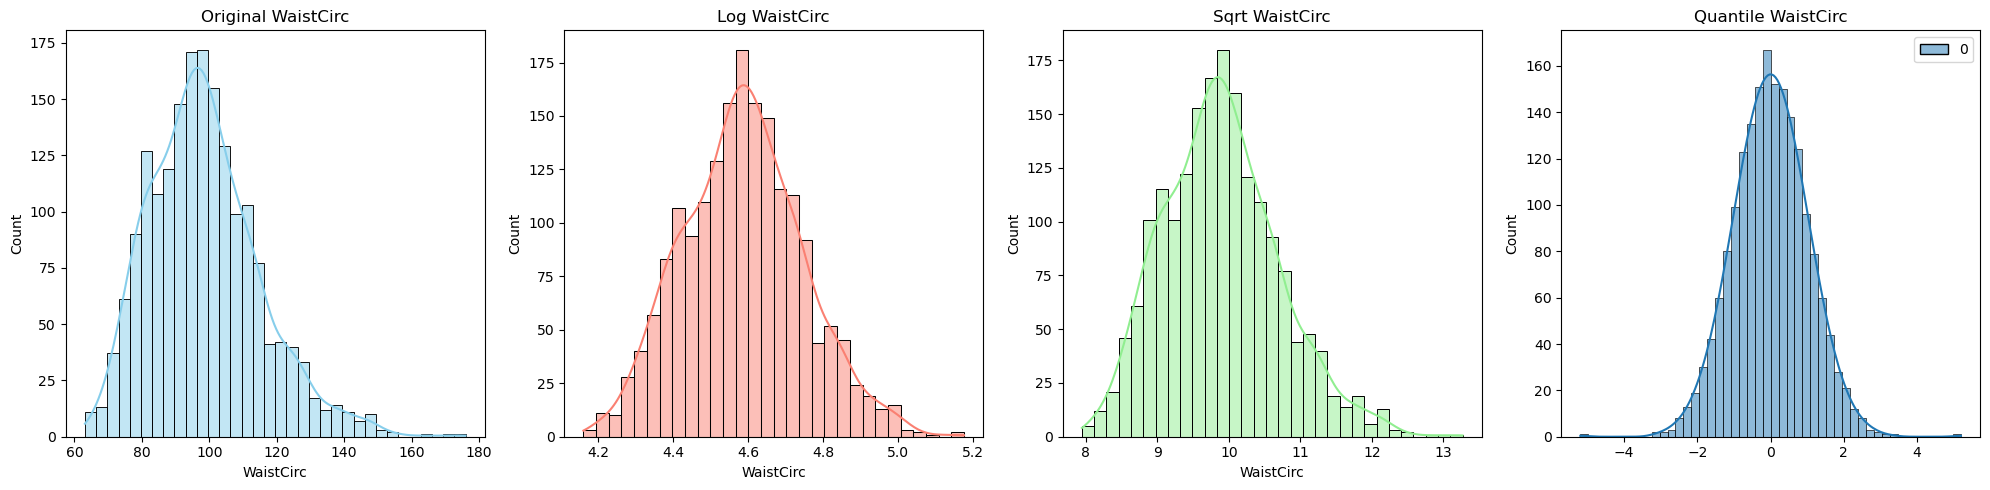

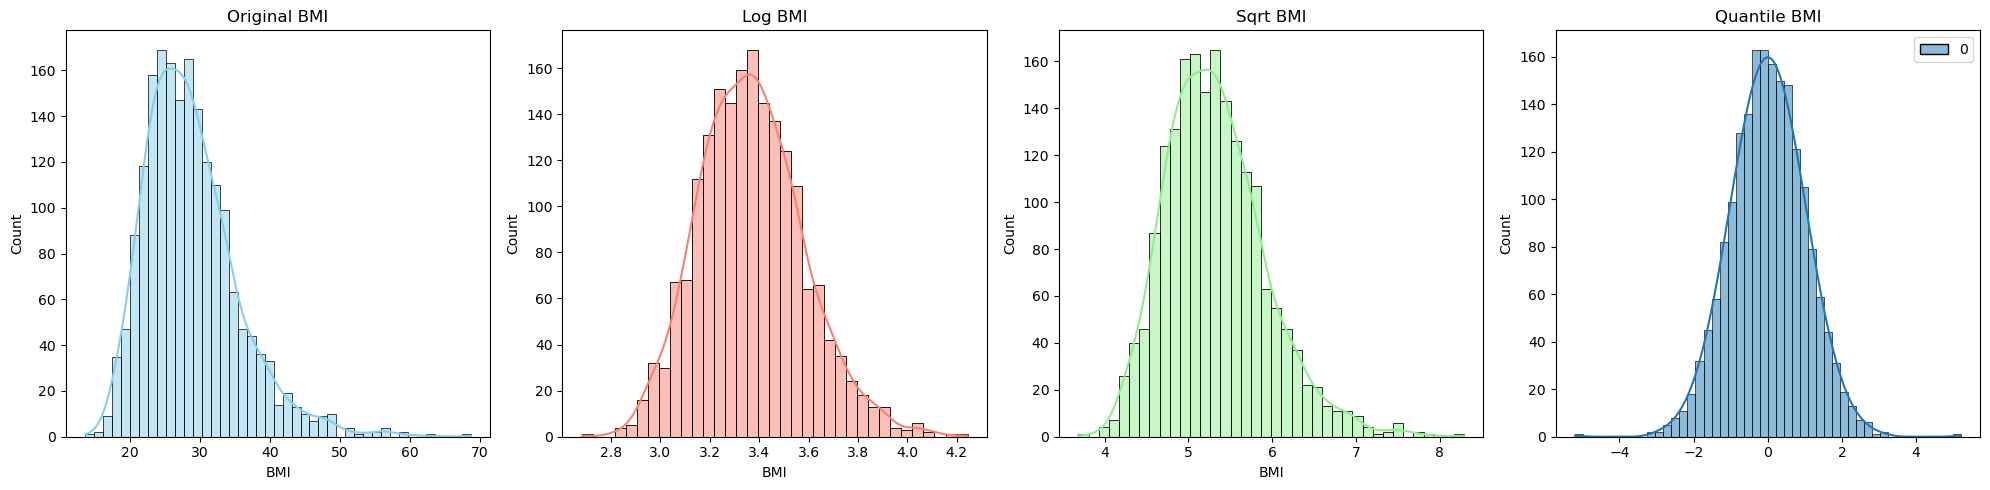

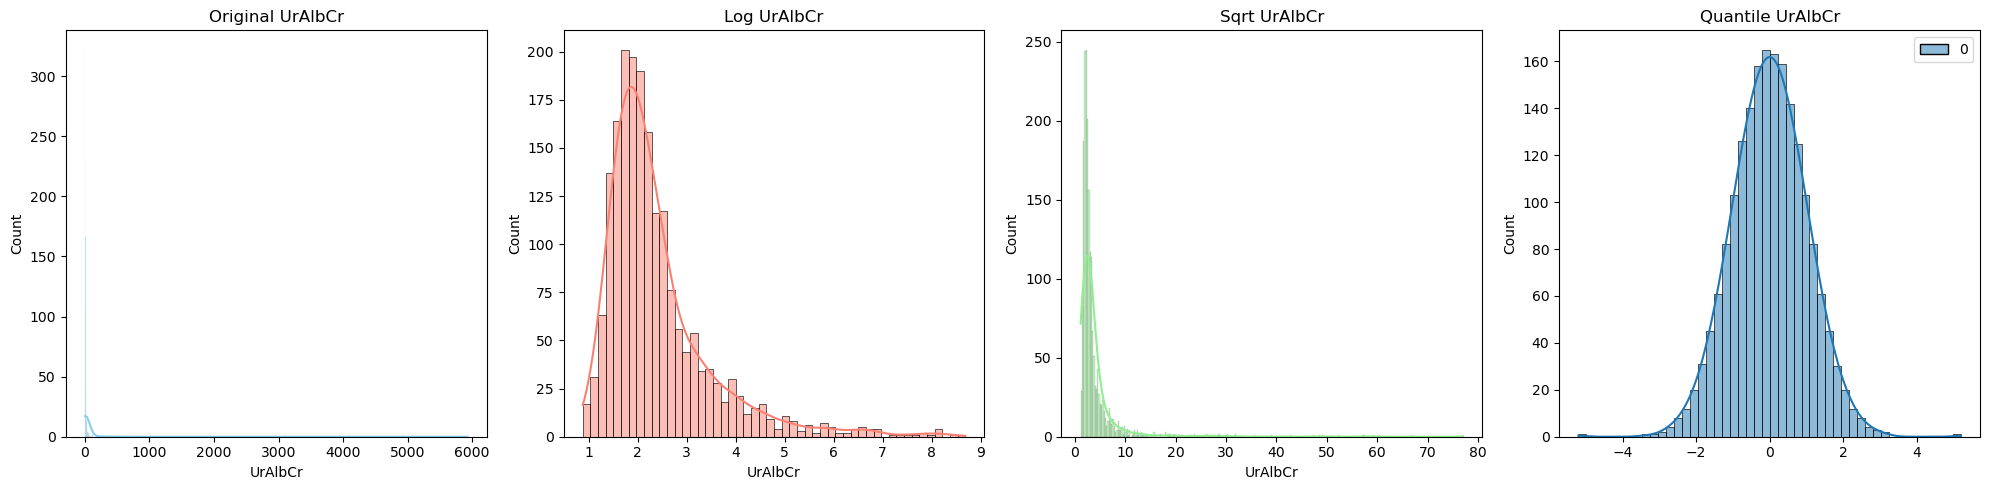

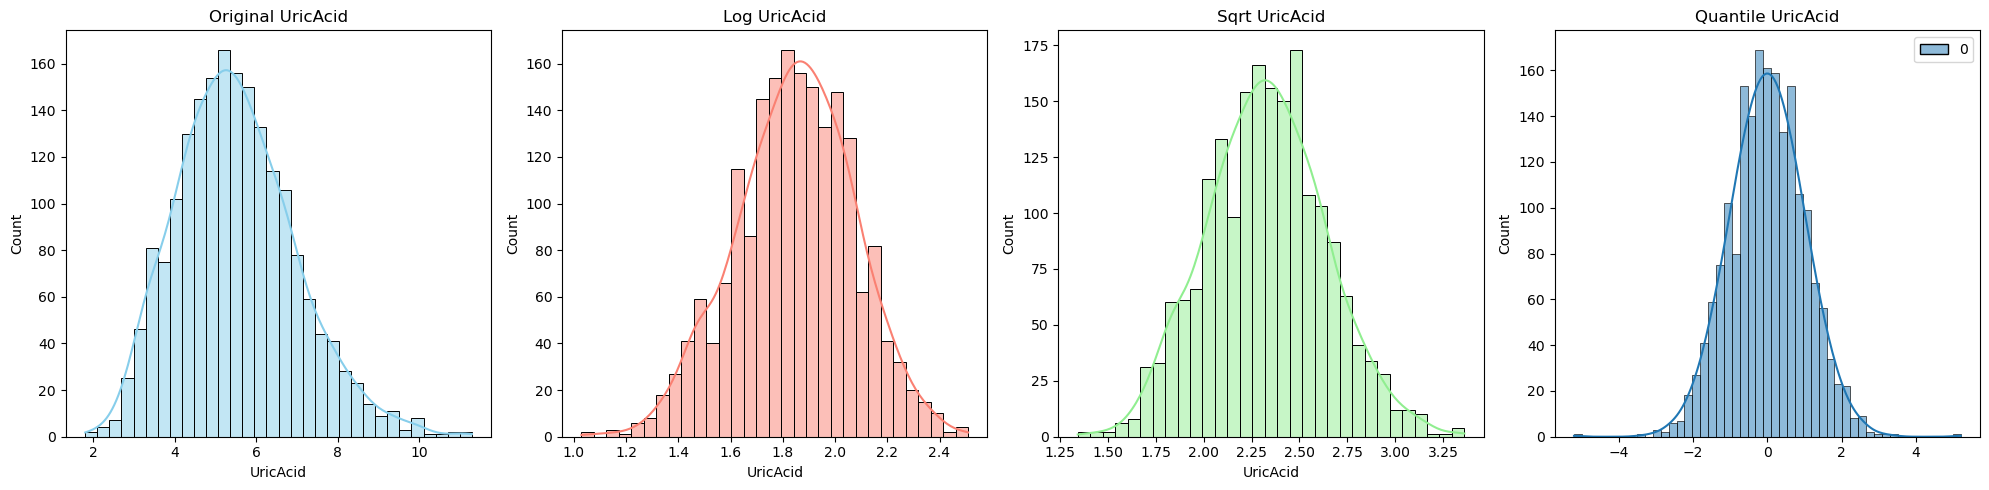

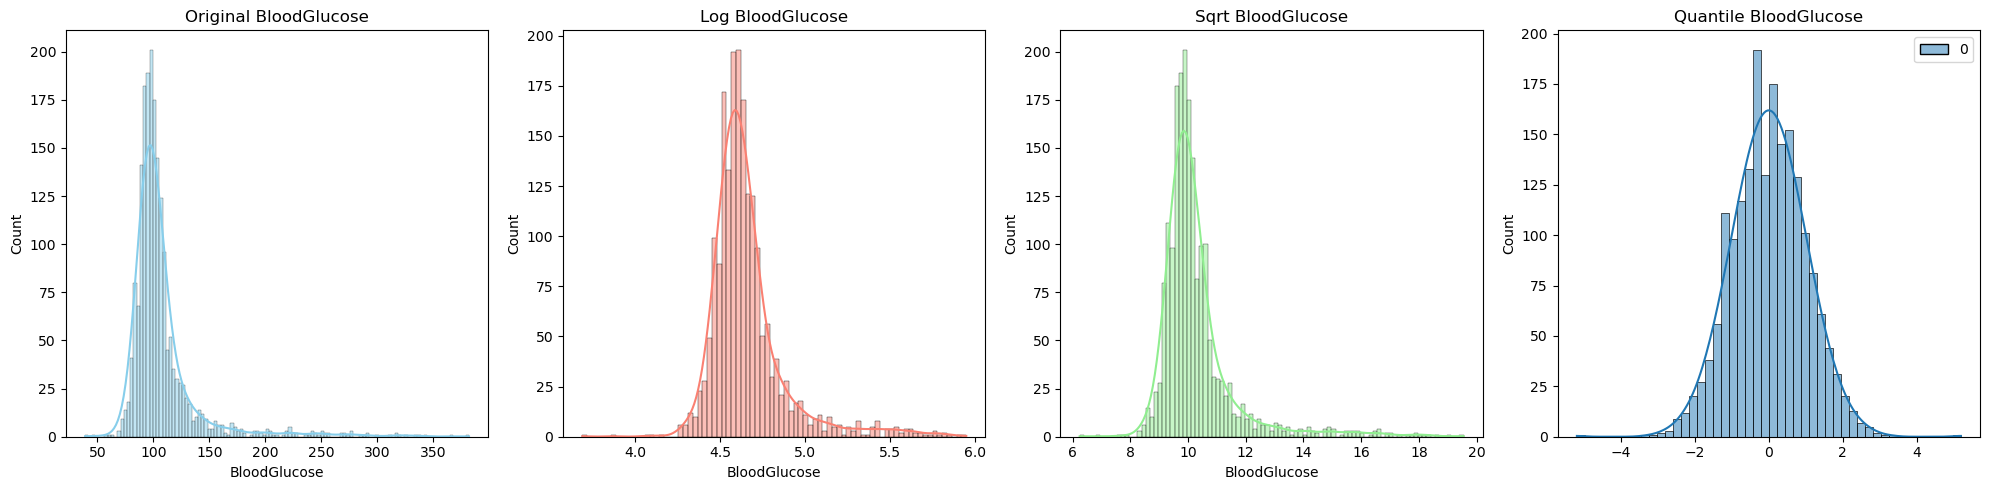

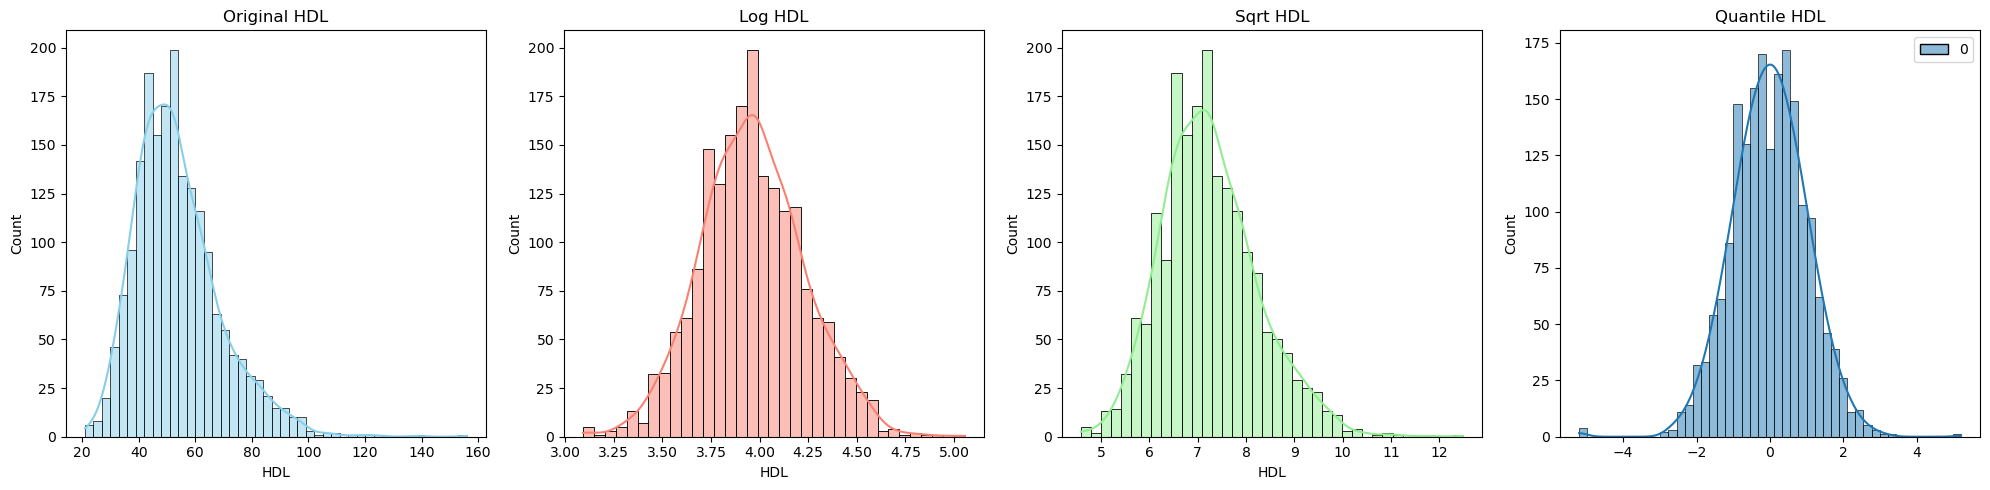

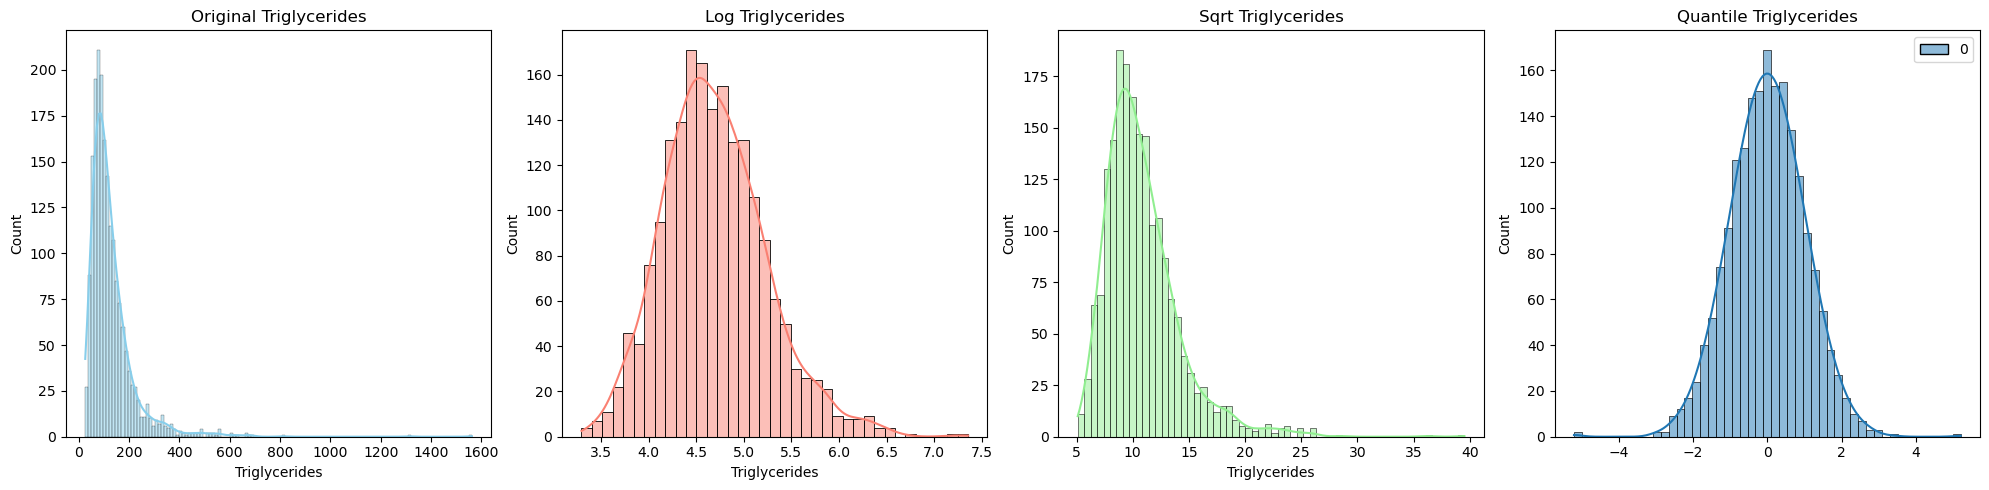

In [115]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import QuantileTransformer, PowerTransformer

def compare_transformations(train_df, numeric_cols):
    for col in numeric_cols:
        fig, axes = plt.subplots(1, 4, figsize=(20, 5))
        
        # Original Data
        sns.histplot(train_df[col], kde=True, ax=axes[0], color='skyblue')
        axes[0].set_title(f'Original {col}')
        
        # Log Transformation
        log_trans = np.log1p(train_df[col])
        sns.histplot(log_trans, kde=True, ax=axes[1], color='salmon')
        axes[1].set_title(f'Log {col}')
        
        # Square Root Transformation
        sqrt_trans = np.sqrt(train_df[col])
        sns.histplot(sqrt_trans, kde=True, ax=axes[2], color='lightgreen')
        axes[2].set_title(f'Sqrt {col}')
        
        # Quantile Transformation
        qt = QuantileTransformer(output_distribution='normal', random_state=42)
        quantile_trans = qt.fit_transform(train_df[[col]])
        sns.histplot(quantile_trans, kde=True, ax=axes[3], color='slateblue')
        axes[3].set_title(f'Quantile {col}')
        
        plt.tight_layout()
        plt.show()

# Select numerical columns
numeric_cols = train_df.select_dtypes(include=['float64', 'int64']).columns
numeric_cols = [col for col in numeric_cols if col not in ['seqn', 'Albuminuria', 'MetabolicSyndrome','Age','Income']]

# Compare transformations
compare_transformations(train_df, numeric_cols)

In [116]:
from sklearn.preprocessing import QuantileTransformer

# Dictionary to store transformers for each variable
transformers = {
    'WaistCirc': QuantileTransformer(output_distribution='normal', random_state=42),
    'BMI': QuantileTransformer(output_distribution='normal', random_state=42),
    'UrAlbCr': QuantileTransformer(output_distribution='normal', random_state=42),
    'UricAcid': QuantileTransformer(output_distribution='normal', random_state=42),
    'BloodGlucose': QuantileTransformer(output_distribution='normal', random_state=42),
    'HDL': QuantileTransformer(output_distribution='normal', random_state=42),  # No transformation needed
    'Triglycerides': QuantileTransformer(output_distribution='normal', random_state=42)
}

# Apply transformations to train and test sets
for col, transformer in transformers.items():
    if transformer is not None:
        # Fit on train
        train_df[f'{col}_trans'] = transformer.fit_transform(train_df[[col]])
        
        # Transform test
        test_df[f'{col}_trans'] = transformer.transform(test_df[[col]])
        
        # Remove original columns
        train_df.drop(col, axis=1, inplace=True)
        test_df.drop(col, axis=1, inplace=True)
    else:
        # Keep original column but rename for consistency
        train_df[f'{col}_trans'] = train_df[col]
        test_df[f'{col}_trans'] = test_df[col]
        train_df.drop(col, axis=1, inplace=True)
        test_df.drop(col, axis=1, inplace=True)

print("Train columns:", train_df.filter(like='_trans').columns.tolist())
print("Test columns:", test_df.filter(like='_trans').columns.tolist())

Train columns: ['WaistCirc_trans', 'BMI_trans', 'UrAlbCr_trans', 'UricAcid_trans', 'BloodGlucose_trans', 'HDL_trans', 'Triglycerides_trans']
Test columns: ['WaistCirc_trans', 'BMI_trans', 'UrAlbCr_trans', 'UricAcid_trans', 'BloodGlucose_trans', 'HDL_trans', 'Triglycerides_trans']


In [82]:
print("Train columns:", train_df.columns.tolist())
print("Test columns:", test_df.columns.tolist())

Train columns: ['seqn', 'Age', 'Sex', 'Marital', 'Income', 'Race', 'WaistCirc', 'BMI', 'Albuminuria', 'UrAlbCr', 'UricAcid', 'BloodGlucose', 'HDL', 'Triglycerides', 'MetabolicSyndrome']
Test columns: ['seqn', 'Age', 'Sex', 'Marital', 'Income', 'Race', 'WaistCirc', 'BMI', 'Albuminuria', 'UrAlbCr', 'UricAcid', 'BloodGlucose', 'HDL', 'Triglycerides', 'MetabolicSyndrome', 'WaistCirc_quantile', 'BMI_quantile', 'UrAlbCr_quantile', 'UricAcid_quantile', 'BloodGlucose_quantile', 'HDL_quantile', 'Triglycerides_quantile']


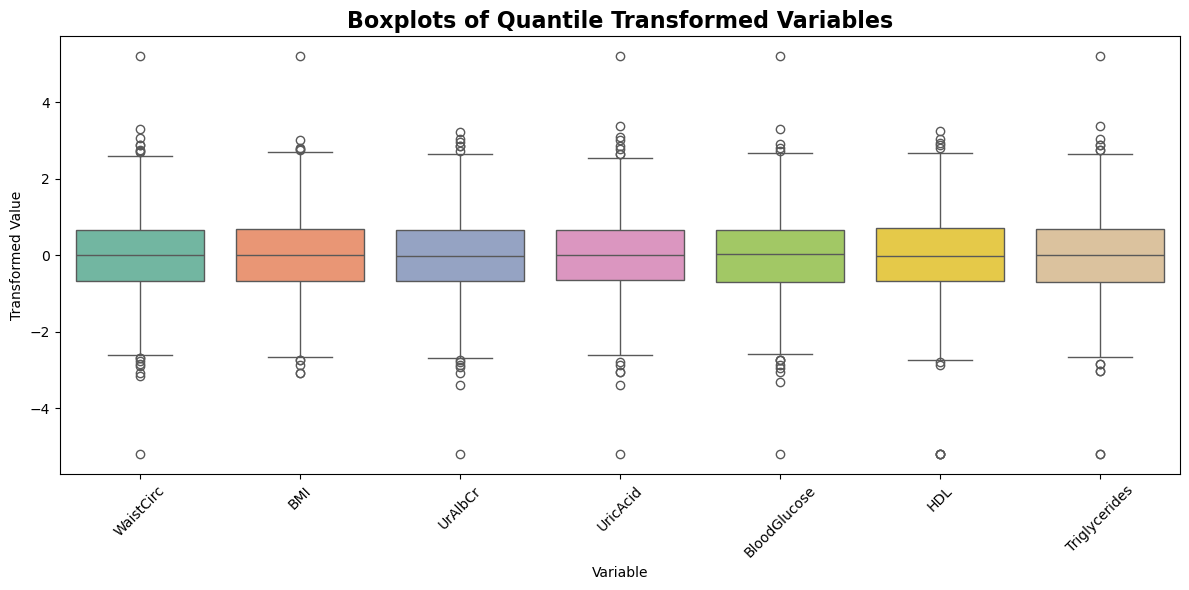

In [101]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import QuantileTransformer

# List of numerical variables to transform
variables = ["WaistCirc", "BMI", "UrAlbCr", "UricAcid", "BloodGlucose", "HDL", "Triglycerides"]

# Initialize quantile transformer
quantile_tf = QuantileTransformer(output_distribution='normal', random_state=42)

# Create a copy to hold transformed data
quantile_df = pd.DataFrame()

# Apply transformation
for var in variables:
    data = train_df[var].dropna()
    transformed = quantile_tf.fit_transform(data.values.reshape(-1, 1)).flatten()
    quantile_df[var] = pd.Series(transformed, index=data.index)

# Melt the DataFrame for seaborn boxplot
quantile_melted = quantile_df.melt(var_name='Variable', value_name='Transformed Value')

# Plot with corrected palette usage
plt.figure(figsize=(12, 6))
sns.boxplot(
    x='Variable', 
    y='Transformed Value', 
    hue='Variable',      # Explicitly use 'Variable' for coloring
    data=quantile_melted, 
    palette='Set2',
    legend=False         # Hide legend (redundant here)
)
plt.title('Boxplots of Quantile Transformed Variables', fontsize=16, fontweight='bold')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [86]:
print(train_df.head())
print(train_df.shape)
print(test_df.head())
print(test_df.shape)

       seqn  Age     Sex  Marital  Income   Race  WaistCirc   BMI Albuminuria  \
174   62861   80  Female  Married  2000.0  White       74.4  18.4           1   
420   63806   70    Male  Married  1700.0  White      108.3  30.2           0   
1980  70212   40  Female  Married  2000.0  White       94.3  27.8           0   
120   62635   27  Female  Married  2000.0  Asian       90.1  26.1           0   
283   63287   78  Female  Widowed     NaN  Black       97.0  25.9           2   

      UrAlbCr  UricAcid  BloodGlucose  HDL  Triglycerides MetabolicSyndrome  
174     33.47       4.5           157   76             61                 0  
420      9.12       6.2           129   36            158                 1  
1980     6.97       4.4            93   40             94                 0  
120      5.50       6.1           118   44            283                 1  
283    535.85       7.8           244   53            126                 1  
(1920, 15)
       seqn  Age     Sex   Marital

In [7]:
# Total missing values per column
missing_counts = train_df.isnull().sum()
missing_percent = (missing_counts / len(train_df)) * 100

# Summary table
missing_summary = pd.DataFrame({
    'Missing Count': missing_counts,
    'Missing %': missing_percent
}).sort_values('Missing %', ascending=False)

print(missing_summary)

                   Missing Count  Missing %
Marital                      159   8.281250
Income                        93   4.843750
WaistCirc                     65   3.385417
BMI                           24   1.250000
seqn                           0   0.000000
Age                            0   0.000000
Sex                            0   0.000000
Race                           0   0.000000
Albuminuria                    0   0.000000
UrAlbCr                        0   0.000000
UricAcid                       0   0.000000
BloodGlucose                   0   0.000000
HDL                            0   0.000000
Triglycerides                  0   0.000000
MetabolicSyndrome              0   0.000000


In [9]:
import missingno as msno
import matplotlib.pyplot as plt

# Matrix plot (shows gaps in data)
msno.matrix(train_df)
plt.title("Missing Data Patterns")
plt.show()

# Heatmap (correlation of missingness across columns)
msno.heatmap(train_df)
plt.title("Missing Data Correlation")
plt.show()

ModuleNotFoundError: No module named 'missingno'

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import math

columns_to_look = ["Sex", "Marital", "Race", "Albuminuria", "MetabolicSyndrome"]

# Grid setup: 2 plots per row
n_cols = 2
n_rows = math.ceil(len(columns_to_look) / n_cols)

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(9, 4 * n_rows))
axes = axes.flatten()

for i, col in enumerate(columns_to_look):
    non_null_values = df[col].dropna()
    value_counts = non_null_values.value_counts()
    labels = value_counts.index.tolist()
    pie_colors = sns.color_palette('Set2', len(labels))

    axes[i].pie(
        value_counts,
        labels=labels,
        shadow=True,
        explode=[0.05] * len(labels),
        autopct='%1.1f%%',
        textprops={'size': 12},
        colors=pie_colors,
        startangle=90
    )
    axes[i].set_title(f'{col} Distribution', fontsize=14)

# Hide unused axes if the number of columns is odd
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()
